# About histograms

https://www.cambridgeincolour.com/tutorials/histograms1.htm

based on opencv docs:
https://docs.opencv.org/3.4/d7/d32/tutorial_js_histogram_begins.html

"So what is histogram ? You can consider histogram as a graph or plot, which gives you an overall
 idea about the intensity distribution of an image. It is a plot with pixel values (ranging from 0 to 255, not always) 
 in X-axis and corresponding number of pixels in the image on Y-axis."

 and some base specification:
 https://docs.opencv.org/3.4/d8/dbc/tutorial_histogram_calculation.html

 




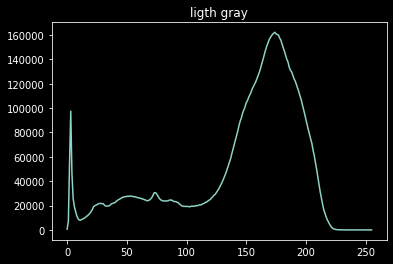

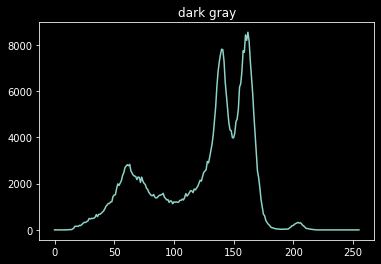

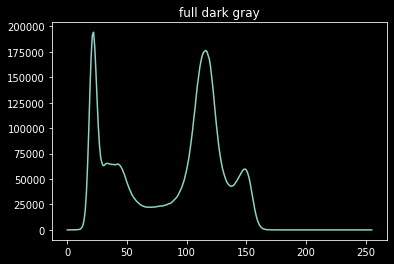

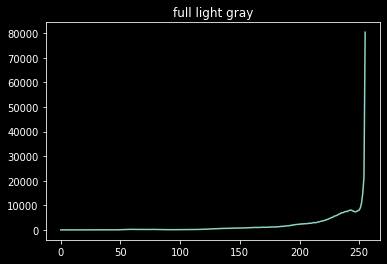

In [3]:
# https://docs.opencv.org/2.4/doc/tutorials/imgproc/histograms/histogram_equalization/histogram_equalization.html#histogram-equalization
import cv2
import os
import numpy as np
from dotenv import load_dotenv
from matplotlib import pyplot as plt 

load_dotenv()

#load the image - ( light image )
abs_file_path = os.getenv('BASE_IMAGE')
light_image = cv2.imread(abs_file_path)
light_gray = cv2.cvtColor(light_image, cv2.COLOR_BGR2GRAY)

#load the image - ( dark image )
abs_file_path = os.getenv('DARK_IMAGE')
dark_image = cv2.imread(abs_file_path)
dark_gray = cv2.cvtColor(dark_image, cv2.COLOR_BGR2GRAY)

#load the image - ( full dark image )
abs_file_path = os.getenv('FULL_DARK_IMAGE')
full_dark_image = cv2.imread(abs_file_path)
full_dark_gray = cv2.cvtColor(full_dark_image, cv2.COLOR_BGR2GRAY)

#load the image - ( full dark image )
abs_file_path = os.getenv('FULL_LIGHT_IMAGE')
full_light_image = cv2.imread(abs_file_path)
full_light_gray = cv2.cvtColor(full_light_image, cv2.COLOR_BGR2GRAY)

## [Separate the image in 3 places ( B, G and R )]
bgr_planes_light = cv2.split(light_image)
bgr_planes_dark = cv2.split(dark_image)
full_planes_dark = cv2.split(full_dark_image)
full_planes_light = cv2.split(full_light_image)

## [Establish the number of bins]
histSize = 256

## [Set the ranges ( for B,G,R) )]
histRange = (0, 256) # the upper boundary is exclusive

## [Set histogram param]
accumulate = False

## [Compute the histograms]
b_hist_light = cv2.calcHist(bgr_planes_light, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist_light = cv2.calcHist(bgr_planes_light, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist_light = cv2.calcHist(bgr_planes_light, [2], None, [histSize], histRange, accumulate=accumulate)

b_hist_dark = cv2.calcHist(bgr_planes_dark, [0], None, [histSize], histRange, accumulate=accumulate)
g_hist_dark = cv2.calcHist(bgr_planes_dark, [1], None, [histSize], histRange, accumulate=accumulate)
r_hist_dark = cv2.calcHist(bgr_planes_dark, [2], None, [histSize], histRange, accumulate=accumulate)

## [Draw the histograms for B, G and R]
hist_w = 512
hist_h = 400
bin_w = int(round( hist_w/histSize ))

histImage_light = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)
histImage_dark = np.zeros((hist_h, hist_w, 3), dtype=np.uint8)

## [Normalize the result to ( 0, histImage.rows )]
cv2.normalize(b_hist_light, b_hist_light, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist_light, g_hist_light, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist_light, r_hist_light, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)

cv2.normalize(b_hist_dark, b_hist_dark, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(g_hist_dark, g_hist_dark, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)
cv2.normalize(r_hist_dark, r_hist_dark, alpha=0, beta=hist_h, norm_type=cv2.NORM_MINMAX)


## [Draw for each channel]
for i in range(1, histSize):
    cv2.line(histImage_light, (bin_w*(i-1), hist_h - int(np.round(b_hist_light[i-1]))),
            (bin_w*(i), hist_h - int(np.round(b_hist_light[i]))),(255, 0, 0), thickness=2)
    cv2.line(histImage_dark, (bin_w*(i-1), hist_h - int(np.round(b_hist_dark[i-1]))),
            (bin_w*(i), hist_h - int(np.round(b_hist_dark[i]))),(255, 0, 0), thickness=2)

    cv2.line(histImage_light, (bin_w*(i-1), hist_h - int(np.round(g_hist_light[i-1]))),
            (bin_w*(i), hist_h - int(np.round(g_hist_light[i]))),(0, 255, 0), thickness=2)
    cv2.line(histImage_dark, (bin_w*(i-1), hist_h - int(np.round(g_hist_dark[i-1]))),
            (bin_w*(i), hist_h - int(np.round(g_hist_dark[i]))),(0, 255, 0), thickness=2)

    cv2.line(histImage_light, (bin_w*(i-1), hist_h - int(np.round(r_hist_light[i-1]))),
            (bin_w*(i), hist_h - int(np.round(r_hist_light[i]))),(0, 0, 255), thickness=2)
    cv2.line(histImage_dark, (bin_w*(i-1), hist_h - int(np.round(r_hist_dark[i-1]))),
            (bin_w*(i), hist_h - int(np.round(r_hist_dark[i]))),(0, 0, 255), thickness=2)

# draw for grayscale
g_light_gray = cv2.calcHist([light_gray],[0],None,[256],[0,256])
g_dark_gray = cv2.calcHist([dark_gray],[0],None,[256],[0,256])
g_full_dark = cv2.calcHist([full_dark_gray],[0],None,[256],[0,256])
g_full_light = cv2.calcHist([full_light_gray],[0],None,[256],[0,256])

# show the plotting graph of an image 
plt.plot(g_light_gray)
plt.title('ligth gray')
plt.show() 

plt.plot(g_dark_gray)
plt.title('dark gray')
plt.show() 

plt.plot(g_full_dark)
plt.title('full dark gray')
plt.show() 

plt.plot(g_full_light)
plt.title('full light gray')
plt.show()

# window = cv2.namedWindow('dark image histogram', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('dark image histogram', 1200, 900)
# cv2.imshow('dark image histogram', histImage_dark)

# window = cv2.namedWindow('light image histogram', cv2.WINDOW_NORMAL)
# cv2.resizeWindow('light image histogram', 1200, 900)
# cv2.imshow('light image histogram', histImage_light)

# cv2.waitKey()
# cv2.destroyAllWindows()